# Coursework Question 1

### Importing the libraries

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import random

# Question 1(a)

##### In this part, the code will demonstrate the Markov Chain Monte Carlo algorithm, in particular the Metropolis-Hastings algorithm.

##### The aim is to simulate random numbers to form a target distribution, which is standard Laplace Distribution in this example. 

##### Standard Laplace Distribution probability density function (pdf) is as such:

##### $f(x) = \frac{1}{2}e^{-|x|}$ where $x \in \mathbb{R}$


In [48]:
# we are using t here as a dummy variable. This is so that we will not be confused with the variable 'x'
def laplace_pdf(t):
    pdf = (1/2)*np.exp(-abs(t))
    return pdf

##### We will now simulate a random value $x_*$ from $N(x_{i-1},s^2)$, a normal distribution with the parameters mean $\mu = x_{i-1}$ and standard deviation $s$. In this simulation, we will take the trivial initial condition $x_0 = 0$

##### We wish to compute the ratio $r(x_*, x_{i-1}) = \frac{f(x_*)}{f(x_{i-1})}$ where the function $f$ is the standard Laplace Distribution pdf we mentioned previously. Essentially what we are computing is the likelihood ratio.

##### Each time we repeat the for-loop, we will compare the ratio with a random value $u$ from $U(0,1)$, a continuous uniform distribution with parameter $a = 0$ and $b = 1$

##### $x_i = \Biggl\{\begin{array}{l}x_*  & \text{if } u < r(x_*, x_{i-1})\\x_{i-1}  &\text{otherwise }\end{array}$

##### ***<u>Explanation of the Algorithm</u>***

##### Assuming we are currently in the present 'state' $x_{i-1}$. The algorithm will then 'propose' a new $x_*$ value from $N(x_{i-1}, s^2)$ and compute likelihood ratio $r(x_*, x_{i-1})$. 

##### *If the likelihood ratio $r$ is more than 1*, which means being in 'state' $x_*$ is more probable than 'state' $x_{i-1}$, then the algorithm will immediately accept $x_*$ as a new 'state' and as an input of the sample. Intuitively, this is exactly what we wanted as we want more samples from the higher density portion of the target distribution.

##### *If the likelihood ratio is less than 1*, which means being in new 'state' $x_*$ is less probable than old 'state' $x_{i-1}$, then the algorithm will only accept the $x_*$ as the new 'state' with a probability $r$, which is being compared with the random value $u$ generated from $U(0,1)$. So the closer the $r$ is to 1, the higher the probability of $x_*$ being accepted as the new 'state' and as input of the sample. Else, we will remain at the old 'state' $x_{i-1}$, and repeat the iteration. Intuitively, what the algorithm is aiming to achieve here is that it ***might*** accept $x_*$ into the sample, which is still important as we still have to consider the less dense portion of the target distribution. It is just ***not as important*** as the main body of target distribution where the majority of the density is at.

In [49]:
#creating a list named 'x' to contain all the Laplace pdf values, starting with x[0] = 0
x = [0]

# N is our sample size
N = 10000

# s will be our standard deviation of our Normal Distribution
s = 1

##### To avoid numerical error, we will make use of logarithmic function, which is a monotonically increasing function. In other words, the inequality will not change after applying logarithmic function on both side. 

##### We can also manipulate the equation using logarithmic properties to make the inequality easier to compare. The equation is as such:

##### $ u < r(x_*, x_{i-1}) \implies log(u) < log[r(x_*,x_{i-1})] \implies log(u) < log\biggl(\frac{f(x_*)}{f(x_{i-1})}\biggl) \implies log(u) < log(f(x_*))-log(f(x_{i-1}))$

##### Note that the log base we are using is the natural log base $e$

In [50]:
# To repeat the procedure for i = 1,2,3,...,N
for i in range(1,N):

    x_star = np.random.normal(loc = x[i-1], scale = s)
    u = np.random.uniform(0,1)
    if math.log(u) < math.log(laplace_pdf(x_star))- math.log(laplace_pdf(x[i-1])):
        x.append(x_star)
    else:
        x.append(x[i-1])

In [51]:
len(x) #checking that we are getting the correct number of simulation, including the initial value

10000

In [52]:
x #checking the list 'x'

[0,
 0.8875857635404473,
 -0.9466312082252709,
 -1.1071085378554606,
 -0.2438348536337379,
 -1.022251871263926,
 -2.244531608720722,
 -1.9656775165207778,
 -2.4201426655076697,
 -2.463778911946957,
 -4.7993544268734425,
 -4.7993544268734425,
 -5.156812944044679,
 -5.332441814533709,
 -5.653248959724873,
 -4.503631009942657,
 -4.503631009942657,
 -4.610145768181272,
 -3.814976429867202,
 -4.060175035759757,
 -4.348044103188045,
 -2.714922539762041,
 -1.938893061799364,
 -2.6836671997144586,
 -2.043799231225368,
 -0.9797635594624501,
 -0.9797635594624501,
 -0.9797635594624501,
 -0.8423479425302051,
 -0.2759600856302762,
 -0.4475375266315845,
 0.05829263603544721,
 0.05829263603544721,
 0.05829263603544721,
 1.6680131004189631,
 -0.08510003661914434,
 0.8235482129359875,
 0.6431200286927952,
 0.15503594656213426,
 -0.004903449498001422,
 -0.004903449498001422,
 -0.004903449498001422,
 0.0819508269975022,
 0.0819508269975022,
 1.2881805264634676,
 1.2881805264634676,
 1.4264161830579618,
 

Constructing the histogram and the kernel density plot in the same figure. From the graph, the density function of $X$ (blue line) & the actual Laplace Distribution (red line) is almost identical

Sample Mean of random variable X:  -0.025625602555667336
Sample Standard Deviation of random variable X:  1.3405018055798184


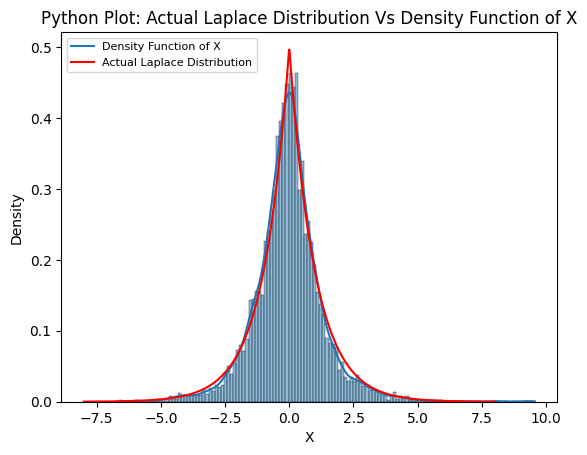

In [53]:
# Plotting the histogram and the density function of x
sns.histplot(x, stat = 'density', kde = True)

# Overlaying the actual Laplace Distribution graph
t = np.linspace(-8,8,1000)
plt.plot(t, laplace_pdf(t), color = 'red')

# Legend and Axis Names
plt.title('Python Plot: Actual Laplace Distribution Vs Density Function of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend(['Density Function of X','Actual Laplace Distribution'], loc = 'upper left', fontsize = 8)

# Sample Mean & Sample Standard Deviation of the random variable X
print('Sample Mean of random variable X: ', stat.mean(x))
print('Sample Standard Deviation of random variable X: ', stat.stdev(x))

# Question 1 (b)

##### In question 1 (b), we wish to calculate the convergence diagnostics $\hat{R}$ value, a value that determines whether the random sample collected through Metropolis-Hasting algorithm will converge to a Laplace Distribution. Following are the procedures to compute $\hat{R}$

##### Step 1: We will repeat this random walk Metropolis algorithm $J$ times and collect $J$ number of samples. Denoting each sequence, known as chain, by $(x^{(j)}_0,x^{(j)}_1,...,x^{(j)}_N)$,for $j = 1,2,...,J$. In each chain $j$, we will use different initial values of $x^{(j)}_0$. In this case, we will let $N = 2000, s = 0.001, J = 4$.

In [54]:
# defining the random walk Metropolis algorithm

def metropolis(N,s):

    initial_value = np.random.uniform(-5,5) # getting a random real number from -5 to 5

    x = [initial_value]

    # To repeat the procedure for i = 1,2,3,...,N
    for i in range(1,N):

        x_star = np.random.normal(loc = x[i-1], scale = s)
        u = np.random.uniform(0,1)
        if math.log(u) < math.log(laplace_pdf(x_star))- math.log(laplace_pdf(x[i-1])):
            x.append(x_star)
        else:
            x.append(x[i-1])
            
    return x

In [55]:
J = 4 # number of samples we want to collect

samples = [metropolis(N = 2000, s = 0.001) for i in range(J)]

In [56]:
# to check if each sample has the correct sample size of 2000 , including the initial value
for i in range(0,J):
    print(len(samples[i]))

2000
2000
2000
2000


In [57]:
for i, sample in enumerate(samples):
    print(f"Sample chain {i+1} : {sample}")

Sample chain 1 : [3.3091574674554955, 3.3098655367756127, 3.3093788941675397, 3.308549230903013, 3.3096737979837307, 3.3081889564388747, 3.3092715528539247, 3.30915965601815, 3.3087625235738725, 3.3088691285860414, 3.308673114018961, 3.3101767492738263, 3.3091041634179343, 3.3076769961803416, 3.308310730598883, 3.3084028570714357, 3.308188983333565, 3.307004637278981, 3.306703193649367, 3.307568418955568, 3.3075787209661924, 3.3068106251747174, 3.30554548013076, 3.3051977975084323, 3.30517856347256, 3.305735250624072, 3.3067051393363727, 3.307988145344682, 3.3079984602050607, 3.308090642560696, 3.3072889554129485, 3.3075715206745584, 3.3058458233637005, 3.306772873776619, 3.3060956020555956, 3.3063861351635397, 3.308158630572045, 3.30768582337387, 3.309667897336768, 3.3092561434624175, 3.3086246180326335, 3.308879541620763, 3.309557796682756, 3.310384424922073, 3.3119632419658305, 3.3130359732938746, 3.311826549305529, 3.3116348048183153, 3.3095979889731493, 3.3104397604170304, 3.30880

##### Step 2: Compute the sample mean $M_j$ for each chain $j$ for $j = 1,2,... ,J$. We then compute the overall sample mean $M$ where $M = \frac{1}{J} \sum \limits_{j=1}^{J} M_j$

In [58]:
sample_means = [stat.mean(sample) for sample in samples]
sample_means #a list of sample means of all the chains

[3.3319152599586515,
 -1.1657104470999389,
 2.0830516927711478,
 2.6400880657101258]

In [59]:
M = sum(sample_means)/J # M represent the overall sample mean
M

1.7223361428349966

##### Step 3: Compute the within-variance $V_j$ for each chain $j = 1,2,...,J$. We then compute the overall within-sample variance $W$ where $W = \frac{1}{J} \sum \limits_{j=1}^{J} V_j$

In [60]:
sample_variances = [stat.variance(sample) for sample in samples]
sample_variances # within-sample variances of all the samples

[8.62541653186323e-05,
 0.0008713599340715115,
 0.0003412548047795552,
 0.0001343242594538112]

In [61]:
W = sum(sample_variances)/J # W represent the overall within-sample variance
W 

0.00035829829090587757

##### Step 4: Compute the between-variance $B$, which is the variance across the sample means $M_j$. In mathematical notation, $B = \frac{1}{J} \sum \limits_{j=1}^{J} (M_j-M)^2$

In [62]:
B = sum([(sample_mean - M)**2 for sample_mean in sample_means])/J
B

2.9759855849555277

##### Step 5: We can now compute the convergence diagnostic $\hat{R}$ where $\hat{R} = \sqrt{\frac{B+W}{W}}$. In general, the closer the value of $\hat{R}$ is to 1, the better the convergence to Laplace Distribution. It is desired for $\hat{R}$ to be lower than 1.05.

In [63]:
R_hat = np.sqrt((B+W)/W)
R_hat

91.14213244864067

Notice that $\hat{R}$ with parameters $N = 2000, s = 0.001, J = 4$ is way beyond the threshold of 1.05, therefore the histogram and the kernel density plot does not converge to Laplace Distribution. The following diagram is an example of Sample Chain 1.

Sample Mean of Sample Chain 1:  3.3319152599586515
Sample Standard Deviation of Sample Chain 1:  0.009287312061012718


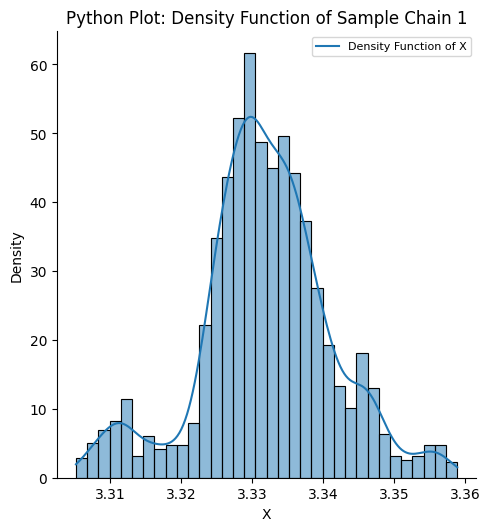

In [64]:
# Plotting the histogram and the density function of x
sns.displot(samples[0],stat = 'density', kde = True)

# Legend and Axis Names
plt.title('Python Plot: Density Function of Sample Chain 1')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend(['Density Function of X'], loc = 'upper right', fontsize = 8)

# Sample Mean & Sample Standard Deviation of Sample Chain 1
print('Sample Mean of Sample Chain 1: ', sample_means[0])
print('Sample Standard Deviation of Sample Chain 1: ', np.sqrt(sample_variances[0]))

##### Step 6: By keeping $N = 2000$ and $J = 4$, we adjust the parameter $s$, ranging betweeen $0.001$ and $1$ to see the relationship between the convergence diagnostic $\hat{R}$ against $s$.

In [65]:
# getting 100 different evenly spaced out s-values ranging 0.001 to 1
s_values = np.linspace(0.001,1,100)
s_values

array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
       0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
       0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
       0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
       0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
       0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
       0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772

In [66]:
R_hats = [] # collect all the R_hats values

for s_value in s_values:
    J = 4 # number of samples we want to collect
    samples = [metropolis(N = 2000, s = s_value) for i in range(J)]

    sample_means = [stat.mean(sample) for sample in samples]
    M = sum(sample_means)/J # M represent the overall sample mean

    sample_variances = [stat.variance(sample) for sample in samples]
    W = sum(sample_variances)/J # W represent the overall within-sample variance

    B = sum([(sample_mean - M)**2 for sample_mean in sample_means])/J # B represent the between-sample variance

    R_hat = np.sqrt((B+W)/W) # R_hat represent the convergence diagnostic values
    R_hats.append(R_hat)

In [67]:
R_hats

[28.742919999772074,
 14.780283885250661,
 4.4003227850521345,
 2.5150497620902446,
 2.660323959265709,
 1.704819123777679,
 1.2256894755602616,
 1.7963892605414071,
 2.236967768961806,
 1.223537717095069,
 1.0932986979053299,
 1.3136464061849633,
 1.3008117851911232,
 1.007911764864458,
 1.1011053903537098,
 1.0975308024877681,
 1.060095179015943,
 1.0977717703260947,
 1.031006001605583,
 1.0170626535067295,
 1.0513390389585098,
 1.0417870061988563,
 1.005460563871432,
 1.0978791160058774,
 1.0090459439167416,
 1.0126459743372125,
 1.0256241173087524,
 1.021716509760987,
 1.035897389138721,
 1.0025215493935387,
 1.0069249867610472,
 1.008510273066148,
 1.0507546272006163,
 1.0314634557793414,
 1.0050424688361643,
 1.0253931321583047,
 1.0178608000711329,
 1.0067887736172945,
 1.0035294479112418,
 1.0073603327220464,
 1.0086026489010997,
 1.010654588000193,
 1.0324400978348107,
 1.0002896230333358,
 1.0118705904151932,
 1.0322839771277166,
 1.0138834376422663,
 1.0120714799190422,
 1.0

From the plot, $\hat{R}$ decay exponentially against $s$. Notice when $s = 1$, the $\hat{R}$ is very close to 1. Therefore, we can see the convergence in distribution in question part 1 (a)

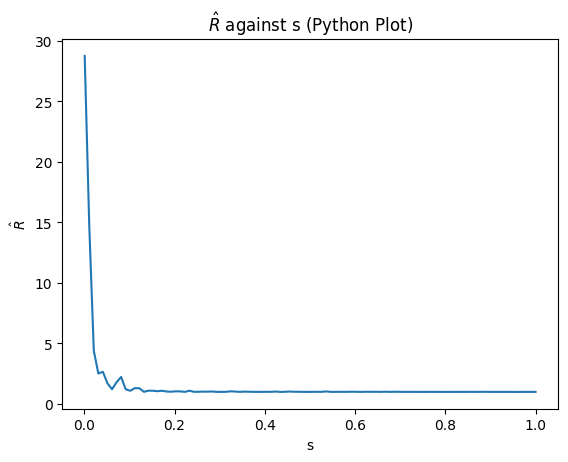

In [68]:
plt.plot(s_values, R_hats)
plt.xlabel('s')
plt.ylabel(r'$\hat{R}$')
plt.title(r'$\hat{R}$ ' + "against s (Python Plot)")
plt.show()

##### ***Intuition behind the convergence diagnostic $\hat{R}$***

##### Since we are selecting $x_*$ from $N(x_{i-1},s^2)$, if the standard deviation $s$ is ***very small***, we are essentially proposing new 'state' $x_*$ that are very close to old 'state' $x_{i-1}$. Therefore, this will lead our sample collected to cluster around the initial value $x_0$, which means the within-variance in each sample chain will be very small, hence producing a very small $W$. However, running multiple samples with each having different initial values, will cause a large between-variance $B$ between the samples. For example, if $x^{(1)}_0 = 1$ and $x^{(2)}_0 = 3$, the sample collected in chain $1$ will closely cluster around the value $1$, while those in chain $2$ will closely cluster around the value $3$, which ultimately causing $B$ to be large. With extremely small $W$ and large $B$ will consequently cause our $\hat{R}$ to be large. 

##### Conversely, if $s$ is ***sufficiently large***, then the new 'state' $x_*$ will be relatively distant from the old state $x_{i-1}$, which also lead to a broader dispersion within each sample chain, which means higher within-variance $W$. However, a noteworthy consequence of a larger $s$ is that, even if all the sample chains have different initial value $x_0$, the chains will eventually converge and collect samples that resemble one another. This convergence results in low between-variance $B$, indicating a similarity in the sampled values among different various chains. This implies that, as the algorithm progresses, the sampled values among the chains with diverse initial condition will converge towards a shared distribution. With large $W$ and small $B$ will consequently cause our $\hat{R}$ to be very close to 1. 

##### This observation explains the inverse relationship between the standard deviation $s$ & the convergence diagnostic $\hat{R}$ and also highlighted the pivotal role of $s$ in influencing the convergence behaviour of the Metropolis-Hasting algorithm.